# Trends

1747 talks of the "TED proper" variety: how many per year? Can we begin to fold in gender? Do we need to wait for topics in order to assign disciplines? 

## Summary

WHAT: After loading the data, we break out the years and the kind of event from the list of events as given on the TED web page for a talk, looking to see how many talks were given in a year and how many talks from the various events make up the overall corpus.

HOW: We operate on lists derived from columns in the dataset, eventually merging them into a custom dataframe so that we can sum values and visualize the results. 

## Imports and Data

In [1]:
# Imports
import pandas as pd, re

In [2]:
# Load the Data
df = pd.read_csv('../output/TEDall_speakers.csv')
print(df.shape, list(df))

(1747, 27) ['Set', 'Talk_ID', 'public_url', 'headline', 'description', 'event', 'duration', 'published', 'tags', 'views', 'text', 'speaker_1', 'speaker1_occupation', 'speaker1_introduction', 'speaker1_profile', 'speaker_2', 'speaker2_occupation', 'speaker2_introduction', 'speaker2_profile', 'speaker_3', 'speaker3_occupation', 'speaker3_introduction', 'speaker3_profile', 'speaker_4', 'speaker4_occupation', 'speaker4_introduction', 'speaker4_profile']


In [3]:
# Lists from the dataframe is probably not the best way to do this: 
urls = df.public_url.tolist()
events = df.event.tolist()

# We should probably replace the URLs with these labels
labels = [item.replace('https://www.ted.com/talks/','') for item in urls ]

## Total Talks by Year

Since we only expect one result below, `re.search(r'\d+', item)` (with or without `.group` appended), might be preferred, but I could not get it to return a string. (It simply returned some version of a regex iterator.)

In [59]:
# regex to capture only the year in the event, e.g. "2006" from "TED2006"
years = [ re.findall(r'\d+', item) for item in events ]

# re.findall returns a list, so here we're simply flattening to a string
years = [ ''.join(item) for item in years]

In [11]:
event_kinds = [ re.sub('\d+', '', item) for item in events ]

In [85]:
# Assemble a dataframe from which to work
Events = pd.DataFrame(list(zip(years, event_kinds, events)), columns = ['Year', 'Event', 'Original'], index=labels )
Events.head()

,Year,Event,Original
al_gore_on_averting_climate_crisis,2006,TED,TED2006
david_pogue_says_simplicity_sells,2006,TED,TED2006
majora_carter_s_tale_of_urban_renewal,2006,TED,TED2006
ken_robinson_says_schools_kill_creativity,2006,TED,TED2006
hans_rosling_shows_the_best_stats_you_ve_ever_seen,2006,TED,TED2006


In [60]:
%matplotlib inline
import matplotlib.pyplot as plt
# fig = plt.subplots(figsize=(16,10))

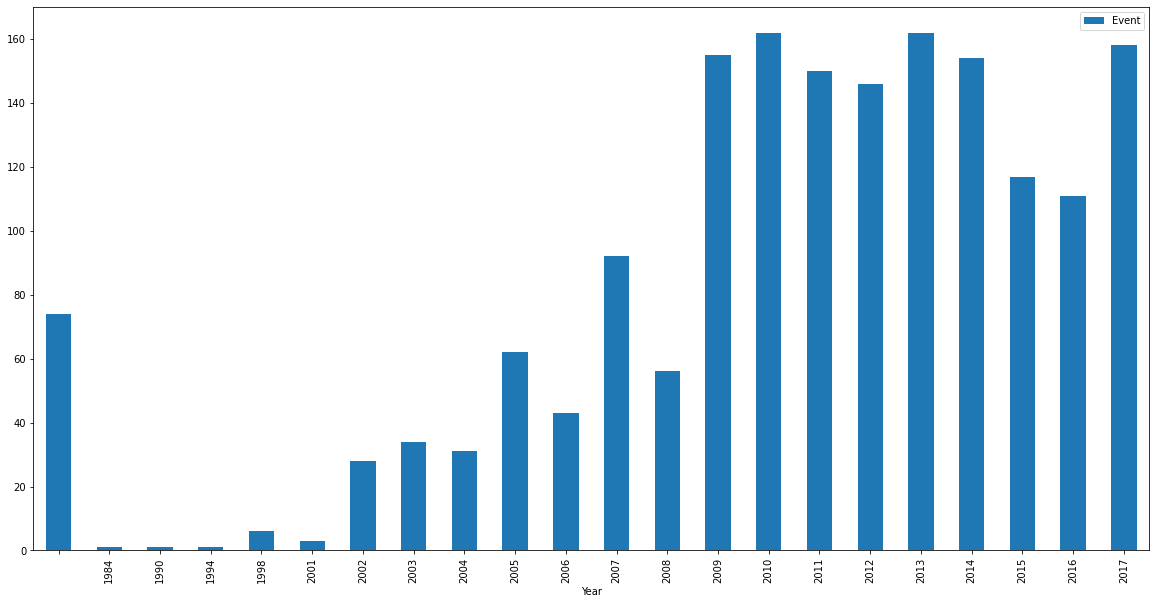

In [61]:
Events.groupby('Year').count().plot(kind='bar', figsize=(20,10))

## The Missing Years

Always, always, always there is some weirdness. What is going on with the leftmost bar in this graph? We've got a little over 70 of *something*. It has no year attached to it and the `isnull` method reported zero. I suspect it's because we have empty strings, which are not null.

So, our next step is to filter the dataframe to show only the rows which have empty strings for the year:

In [66]:
Events[Events['Year'] == '']

,Year,Event,Original
johann_hari_everything_you_think_you_know_about_addiction_is_wrong,,TEDGlobalLondon,TEDGlobalLondon
jon_ronson_what_happens_when_online_shaming_spirals_out_of_control,,TEDGlobalLondon,TEDGlobalLondon
yuval_noah_harari_what_explains_the_rise_of_humans,,TEDGlobalLondon,TEDGlobalLondon
tony_wyss_coray_how_young_blood_might_help_reverse_aging_yes_really,,TEDGlobalLondon,TEDGlobalLondon
jim_al_khalili_how_quantum_biology_might_explain_life_s_biggest_questions,,TEDGlobalLondon,TEDGlobalLondon
...,...,...,...
zeynep_tufekci_we_re_building_a_dystopia_just_to_make_people_click_on_ads,,TEDGlobal>NYC,TEDGlobal>NYC
robert_muggah_the_biggest_risks_facing_cities_and_some_solutions,,TEDGlobal>NYC,TEDGlobal>NYC
per_espen_stoknes_how_to_transform_apocalypse_fatigue_into_action_on_global_warming,,TEDGlobal>NYC,TEDGlobal>NYC
naoko_ishii_an_economic_case_for_saving_the_planet,,TEDGlobal>NYC,TEDGlobal>NYC


We write the dataframe above to a CSV file in order to examine it:

In [68]:
# Events[Events['Year'] == ''].to_csv('../output/noyear.csv')

A hand inspection of the events reveals there are 5 events without dates in their event name. The cell below confirms the events and also counts them: 

In [86]:
Events[Events['Year'] == ''].groupby('Event').count()

,Year,Original
Event,,
TEDGlobal>Geneva,11,11
TEDGlobal>London,13,13
TEDGlobal>NYC,8,8
TEDGlobalLondon,8,8
TEDSummit,34,34


The code below masks the dataframe in place such that if the event is one of the above, it replaces the value in the `Year` column with the value at the end of the expression, which is here a number in a string. For the sake of clarity, I have repeated it for each find and replace that needed to get done.

In [87]:
Events.loc[Events['Event'] == 'TEDGlobal>Geneva', 'Year'] = '2015'

In [88]:
Events.loc[Events['Event'] == 'TEDGlobal>London', 'Year'] = '2015'

In [89]:
Events.loc[Events['Event'] == 'TEDGlobal>NYC', 'Year'] = '2017'

In [90]:
Events.loc[Events['Event'] == 'TEDGlobalLondon', 'Year'] = '2015'

Having made those replacements, we are left with only TEDSummit, which occurred twice, April 2010 and June 2016. All the 2012 events were published by 2013, so we can pull in that column, append it to our dataframe, find that value in `published` and use it to replace the values in `Event`.

First, here is the cell demonstrating what work remains need to be done:

In [91]:
Events[Events['Year'] == ''].groupby('Event').count()

,Year,Original
Event,,
TEDSummit,34,34


Our first step is to grap the publication dates for the talks and then to add them to our current dataframe:

In [95]:
published = df.published.tolist()

Events['Posted'] = published

Events.head()

,Year,Event,Original,Posted
al_gore_on_averting_climate_crisis,2006,TED,TED2006,6/27/06
david_pogue_says_simplicity_sells,2006,TED,TED2006,6/27/06
majora_carter_s_tale_of_urban_renewal,2006,TED,TED2006,6/27/06
ken_robinson_says_schools_kill_creativity,2006,TED,TED2006,6/27/06
hans_rosling_shows_the_best_stats_you_ve_ever_seen,2006,TED,TED2006,6/27/06


Now, let's check the dates to see how we are going to fill things in:

In [98]:
Events[Events['Year'] == ''].groupby('Event').head(40)

,Year,Event,Original,Posted
marwa_al_sabouni_how_syria_s_architecture_laid_the_foundation_for_brutal_war,,TEDSummit,TEDSummit,7/5/16
alexander_betts_why_brexit_happened_and_what_to_do_next,,TEDSummit,TEDSummit,7/6/16
emma_marris_nature_is_everywhere_we_just_need_to_learn_to_see_it,,TEDSummit,TEDSummit,7/13/16
el_seed_a_project_of_peace_painted_across_50_buildings,,TEDSummit,TEDSummit,7/19/16
gerard_ryle_how_the_panama_papers_journalists_broke_the_biggest_leak_in_history,,TEDSummit,TEDSummit,7/20/16
ed_boyden_baby_diapers_inspired_this_new_way_to_study_the_brain,,TEDSummit,TEDSummit,7/21/16
suzanne_simard_how_trees_talk_to_each_other,,TEDSummit,TEDSummit,7/22/16
ngozi_okonjo_iweala_how_africa_can_keep_rising,,TEDSummit,TEDSummit,8/11/16
monica_araya_a_small_country_with_big_ideas_to_get_rid_of_fossil_fuels,,TEDSummit,TEDSummit,8/15/16
sarah_parcak_hunting_for_peru_s_lost_civilizations_with_satellites,,TEDSummit,TEDSummit,8/17/16


As luck would have it, all the TEDSummits missing a year are actually those from the 2016 event. Okay, that makes filling in that value much easier:

In [99]:
Events[Events['Year'] == ''] = '2016'

Having filled the last of the missing information in, we make sure:

In [100]:
Events[Events['Year'] == ''].groupby('Event').count()

,Year,Original,Posted
Event,,,


And having done that, we can finally re-run our command to create a graph to see the talks by year they were initially given:

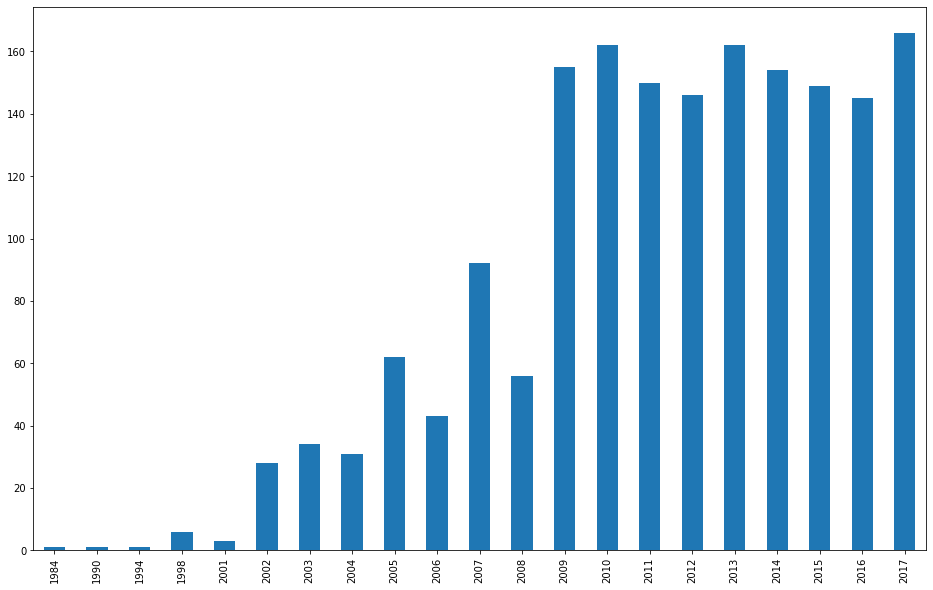

In [107]:
Events['Year'].value_counts().sort_index(ascending=True).plot(kind='bar', figsize = (16,10))

## Total Talks by Event

In [ ]:
Events[Events['Event'] != 'TED'].groupby('Event').count().plot.bar()